In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Load Task Image

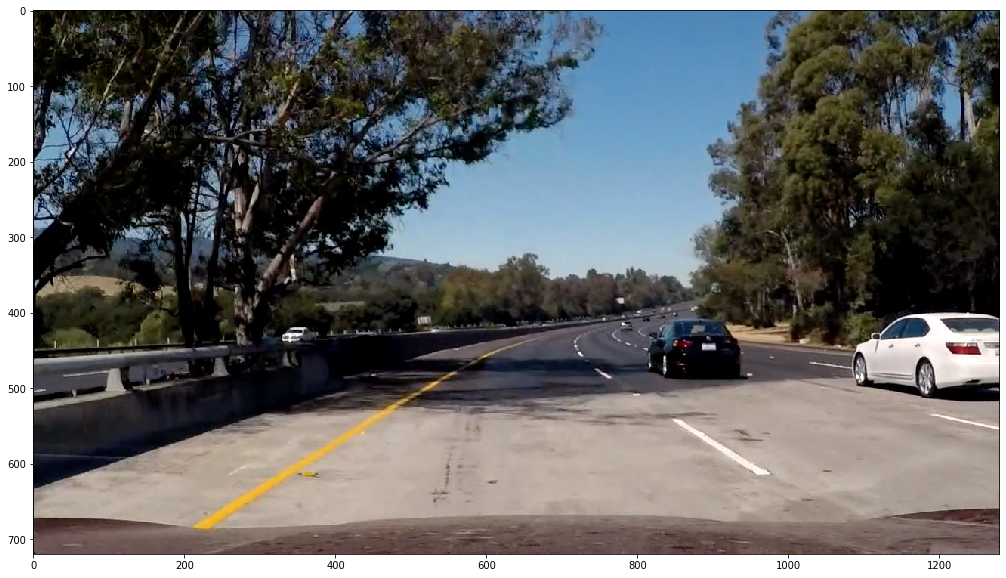

In [2]:
task_image = mpimg.imread('./test5.jpg')
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(task_image)

## Sobel X / Y Threshold

In [40]:
# X or Y sobel gradient
def abs_sobel_thresh(image, orient, sobel_kernel, thresh):
    # TODO: Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    channel = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    low,high = thresh
    # TODO: Apply x or y gradient with the OpenCV Sobel() function
    if(orient=='x'):
        x_sobel = cv2.Sobel(channel,cv2.CV_64F,1,0,ksize=5)
    if(orient=='y'):
        x_sobel = cv2.Sobel(channel,cv2.CV_64F,0,1,ksize=5)    
    abs_sobel = np.absolute(x_sobel)
    # and take the absolute value
   
    # TODO: Rescale back to 8 bit integer
    abs_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # TODO: Create a binary image of ones where threshold is met, zeros otherwise
  
    temp =np.ma.masked_inside(abs_sobel,low,high)           
    abs_sobel_output = np.zeros_like(temp)
    # Return the binary image
    return abs_sobel_output


## Sobel Magnitude Threshold

In [59]:
# Magnitude using X and Y sobel gradient
def mag_thresh(image, sobel_kernel, mag_thresh):
    # TODO: Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    low,high = mag_thresh
    channel = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    
    # TODO: Calculate the gradient magnitude
    x = cv2.Sobel(channel,cv2.CV_64F,1,0,ksize=5)
    y= cv2.Sobel(channel,cv2.CV_64F,0,1,ksize=5)
    gradmag=np.sqrt(np.square(x)+np.square(y))
    # TODO:  Rescale to 8 bit
    gradmag = np.uint8(255*gradmag/np.max(gradmag))
   
    # TODO: Create a binary image of ones where threshold is met, zeros otherwise
    temp =np.ma.masked_inside(gradmag,low,high)  
    mag_binary = np.zeros_like(temp)
   
 
    # Return the binary image
    return mag_binary


## Sobel Direction Threshold

In [51]:
# Direction using X and Y sobel gradient
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # TODO: Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    low,high = thresh
    channel = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    
    # TODO: Calculate the gradient magnitude
    x = cv2.Sobel(channel,cv2.CV_64F,1,0,ksize=5)
    y= cv2.Sobel(channel,cv2.CV_64F,0,1,ksize=5)
    absgraddir = np.arctan2(y,x)
    # TODO: Calculate the gradient direction using np.arctan2 function
    
    # TODO: Rescale to 8 bit
    absgraddir = np.uint8(255*absgraddir/np.max(absgraddir))
   
    # TODO: Create a binary image of ones where threshold is met, zeros otherwise   
    temp =np.ma.masked_inside(absgraddir,low,high)
    dir_binary =  np.zeros_like(temp)

    # Return the binary image
    return dir_binary

## Visualize Sobel Thresholds Results

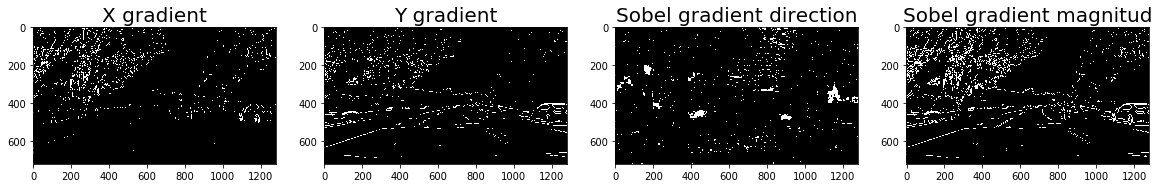

In [60]:
#TODO: Visualize the following:

# X gradient
x_sobel=abs_sobel_thresh(task_image, 'x', sobel_kernel=3, thresh=(50,255))
# Y gradient
y_sobel=abs_sobel_thresh(task_image, 'y', sobel_kernel=3, thresh=(50,255))
# Sobel gradient direction
dir_sobel= dir_threshold(task_image, sobel_kernel=3, thresh=(0, np.pi/2))
# Sobel gradient magnitude
mag_sobel = mag_thresh(task_image, sobel_kernel=3, mag_thresh=(50,255))

# visualize results
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
# X gradient
ax1.set_title('X gradient', fontsize=20)
ax1.imshow(x_sobel,cmap='gray')
# Y gradient
ax2.set_title('Y gradient', fontsize=20)
ax2.imshow(y_sobel,cmap='gray')
# Sobel gradient direction
ax3.set_title('Sobel gradient direction', fontsize=20)
ax3.imshow(dir_sobel,cmap='gray')
# Sobel gradient magnitude
ax4.set_title('Sobel gradient magnitud', fontsize=20)
ax4.imshow(mag_sobel,cmap='gray')